# Rapidity and Pseudorapidity Variables

We have pseudorapidity $\eta$:
$$ \eta = -\ln \big(\tan (\frac{\theta}{2})  \big)$$ 
and rapidity, $y$:

$$y = \ln \bigg( \frac{ \sqrt{m^2 + p_T^2 \cosh^2 \eta} + p_T \sinh \eta }{\sqrt{m^2 +p_T^2}} \bigg) $$
Or:
$$y = \ln \bigg( \  \frac{ \cosh \eta \sqrt{1 + \frac{m^2}{p_T^2 \cosh^2 \eta } } +  \sinh \eta }{\sqrt{1 +\frac{m^2}{p_T^2} }} \bigg)  \approx  \eta - \frac{\tanh \eta }{2} \frac{m^2}{p_T^2}$$
where the approximation holds when $\frac{m^2}{p_T^2} \ll  1$.

Note: $\cosh^2 \eta \leq 1$ so  $\frac{1}{\cosh^2 \eta } \leq 1$.

The pseudorapidity depends on angles like:

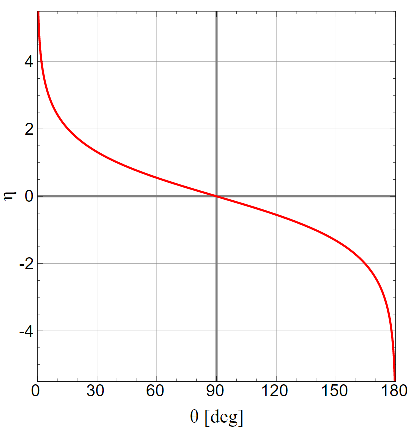

We'll see how $y$ depends on the ratio $m^2/p_T^2$ and $\eta$.

In [1]:
# Import the relevant libraries

import numpy as np
import matplotlib.pyplot as plt 

# Set graph parameters 
scale = 0.8

plt.rcParams.update({
    'font.size': 20,
    'figure.figsize': (16*scale, 9*scale),
    'lines.linewidth': 2.5,
    'axes.linewidth':2    
})

In [2]:
# Test these m_T^2/p_T^2 ratios (energy is somewhat of a misnomer here)
energy_ratio =np.array([0.01, 0.05, .2, 0.5, 1, 10, 100])

In [3]:
def y_func (eta, ratio):
    # Rapidity as of function of psuedorapidity (eta) and "energy" ratio m^2/p_T^2 (ratio )
    
    numerator= np.sqrt(ratio+(np.cosh(eta))**2) + np.sinh(eta)
    denominator = np.sqrt(1 + ratio)
    
    return np.log(numerator/denominator)

Max error for ratio = 0.01 is  0.499 percent 
Ave error for ratio = 0.01 is  0.242 percent
 
Max error for ratio = 0.05 is  2.47 percent 
Ave error for ratio = 0.05 is  1.2 percent
 
Max error for ratio = 0.2 is  9.54 percent 
Ave error for ratio = 0.2 is  4.6 percent
 
Max error for ratio = 0.5 is  22.5 percent 
Ave error for ratio = 0.5 is  10.8 percent
 
Max error for ratio = 1 is  41.4 percent 
Ave error for ratio = 1 is  19.7 percent
 
Max error for ratio = 10 is  232 percent 
Ave error for ratio = 10 is  107 percent
 
Max error for ratio = 100 is  905 percent 
Ave error for ratio = 100 is  418 percent
 


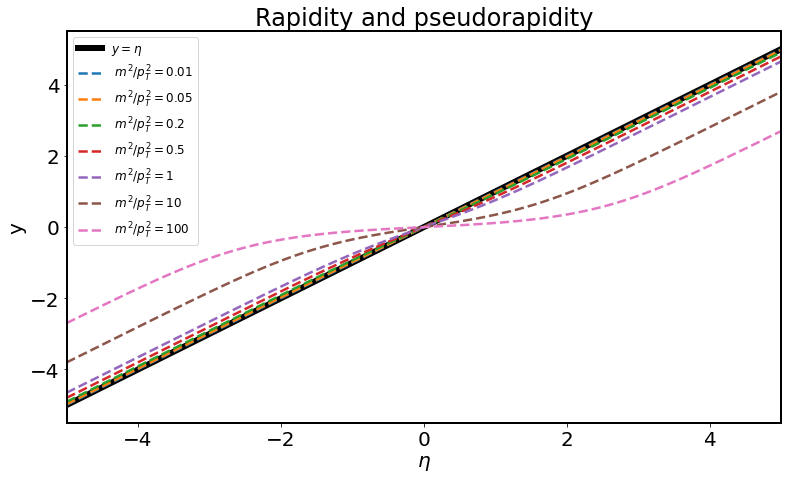

In [4]:
eta = np.linspace(-5,5,300)

plt.plot(eta, eta, label = '$y =\eta$', color ='k', lw= 6)
for item in energy_ratio:
    y = y_func(eta, item)
    plt.plot(eta, y, label =f' $ m^2/p_T^2 =%1.3g $'%item, ls='--')
    
    # Get error ratio and print max/ave. error
    error_ratio =  np.abs((eta-y)/y)
    print(f'Max error for ratio = %1.3g is  %1.3g percent '%(item, 100*error_ratio.max()))
    print(f'Ave error for ratio = %1.3g is  %1.3g percent\n '%(item, 100*error_ratio.mean()))
    
plt.legend(fontsize=12)
plt.xlabel('$\eta$')
plt.ylabel('y')
plt.title('Rapidity and pseudorapidity')
plt.xlim(eta.min(),eta.max())
plt.savefig('Rapidity and Pseudorapidity.png', dpi=300)

For positive values $ y < \eta$ and the inequality is reversed for negative values. This can be combined to: $|y| \leq |\eta|$, with equality at $\eta =0$.

Also, since 

$$ y \approx \eta - \frac{\tanh \eta }{2} \frac{m^2}{p_T^2}$$ 

and $\max(\tanh x /x) = 1$ at x =0 (see [here](https://www.wolframalpha.com/input/?i=tanhx%2Fx+plot+)), then for small values of $\frac{m^2}{p_T^2}$ we should expect:
$$max \: error \: ratio  \approx \frac{1}{2} \frac{m^2}{p_T^2}$$
Looking at the max errors printed, this is what is seen for small $\frac{m^2}{p_T^2}$.

Note: $|y - \eta| \rightarrow 0$ as $\eta \rightarrow 0$, but at the same rate as $\eta$, hence the ratio of the limit is 1. Below the relative error is plotted.

Finally, since $|\tanh \eta | < 1$ and $\tanh \eta \rightarrow \pm 1$ as $\eta \rightarrow \pm \infty$ then we also expect 
$$max \: absolute \: error \approx \frac{1}{2} \frac{m^2}{p_T^2}$$
and that it occurs for large $\eta$.

(0.0, 50.0)

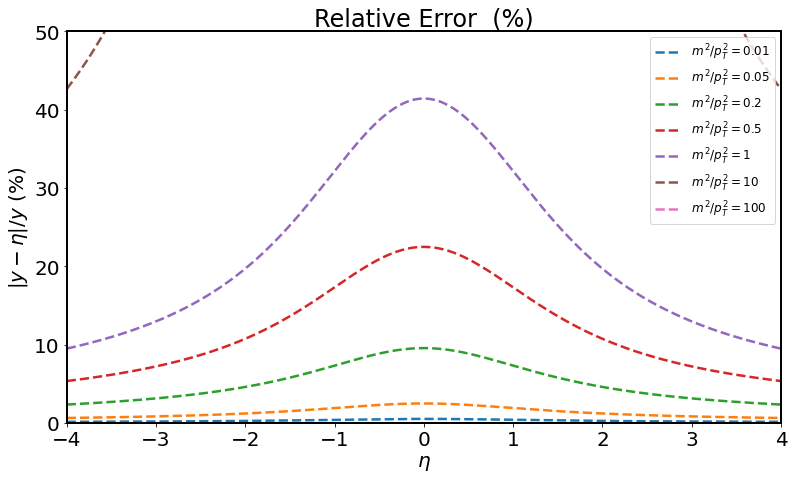

In [5]:
eta = np.linspace(-4,4,300)

#plt.plot(eta, 0*eta, label = '$y =\eta$', color ='k', lw= 6)
for item in energy_ratio:
    y = y_func(eta, item)
    
    
    # Get error ratio and print max/ave. error
    error_ratio =  np.abs((eta-y)/y)
    plt.plot(eta, 100*error_ratio , label =f' $ m^2/p_T^2 =%1.3g $'%item, ls='--')
    
plt.legend(fontsize=12)
plt.xlabel('$\eta$')
plt.ylabel('$|y - \eta|/y$ (%)')
plt.title('Relative Error  (%)')
plt.xlim(eta.min(),eta.max())
plt.ylim(0,50)

The relative error on $\frac{m^2}{p_T^2}=100$ is too large to be seen on the graph.

(0.0, 2.3)

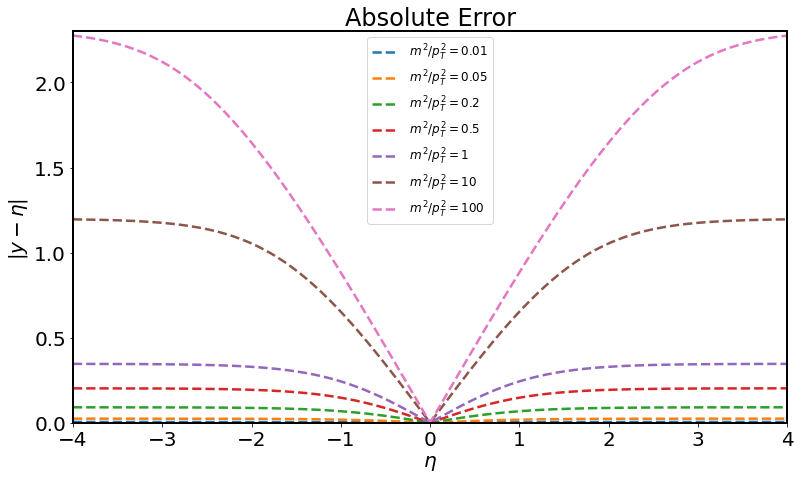

In [6]:
eta = np.linspace(-4,4,300)

#plt.plot(eta, 0*eta, label = '$y =\eta$', color ='k', lw= 6)
for item in energy_ratio:
    y = y_func(eta, item)
    
    
    # Get error ratio and print max/ave. error
    error_ratio =  np.abs((eta-y))
    plt.plot(eta, error_ratio , label =f' $ m^2/p_T^2 =%1.3g $'%item, ls='--')
    
plt.legend(fontsize=12)
plt.xlabel('$\eta$')
plt.ylabel('$|y - \eta|$ ')
plt.title('Absolute Error')
plt.xlim(eta.min(),eta.max())
plt.ylim(0,2.3)

# Simulator

Using our previous simulator we'll see the pseudorapidity distribution for the electron. In the approximation that the electron is massless this is also rapidity distribution. 

Again, the scattered electron's cosine angle is uniformly distributed between -1 and 1.

In [7]:
# Set up variables (working in GeV)

E_e = 15                 # Incoming e energy
E_T = 106.6543           # Incoming target energy, so that E_cm = 80 GeV
m_T = 0.938              # Take proton as target

#Uniformly randomly distribute E_e_prime and cos theta
exp = 5             # Exponent

N_events = 10**exp  # Number of events we'll generate
N_bins = 100        # Number of bins used (gotten purely empircally)

E_e_prime = np.random.uniform(1,E_e, N_events)
cos_th_e = np.random.uniform(-1.,1., N_events)

theta_e = np.arccos(cos_th_e)  # Get theta in radians

In [8]:
eta = - np.log( np.tan(theta_e/2)) # eta = psuedorapidity

For $ 0\leq \theta < \pi$  then  $\tan(\theta /2)$ is non-negative and:
$$ \tan(\theta /2) = ( \frac{1- \cos \theta}{1 + \cos \theta})^{1/2} $$
Then:
$$ \eta = -\ln \big( ( \frac{1- \cos \theta}{1 + \cos \theta})^{1/2}  \big)$$
$$ e^{-2\eta} =   \frac{1- \cos \theta}{1 + \cos \theta}$$
$$ e^{-2\eta}(1 + \cos \theta) =  1- \cos \theta$$
$$  \cos \theta (1 +e^{-2\eta} )  =  1  -  e^{-2\eta}$$
Therefore,
$$\cos \theta= \frac{1  -  e^{-2\eta}}{1 + e^{-2\eta}} =  \tanh (\eta)$$
So, changing variables and looking at the Jacobian:
$$ P(\cos \theta) d \cos \theta=  P(  \tanh (\eta)) | \frac{d \tanh (\eta)}{d \eta} | d\eta $$
$$=   P( \tanh (\eta)) \frac{1}{\cosh^2 \eta}d \eta$$
Thus, for $\cos \theta $ uniformly distributed between -1 and 1 we expect a distribution of :
$$\frac{1}{2\cosh^2 \eta}  $$

Normalization [checks out](https://www.wolframalpha.com/input/?i=integral+of+1%2F%282cosh%5E2%28x%29%29+from+-infinity+to+infinity).

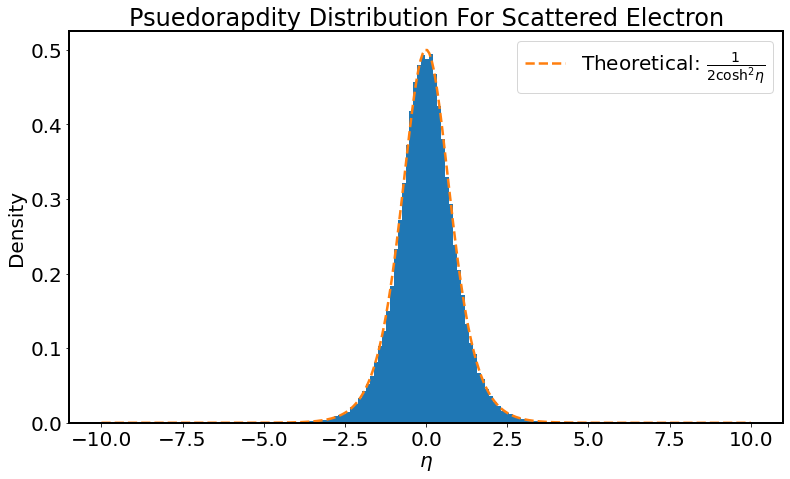

In [9]:
xax = np.linspace(-10,10,300)
theoretical_eta = 0.5/((np.cosh(xax))**2)

plt.hist(eta, N_bins, density= True)
plt.plot(xax, theoretical_eta, label = r"Theoretical: $\frac{1}{2 \cosh^2 \eta}$", ls ='--')
plt.ylabel('Density')
plt.xlabel('$\eta$')
plt.legend()
#plt.xlim(-10,10)
plt.title('Psuedorapdity Distribution For Scattered Electron')
plt.savefig('Pseudorapidity distribution from uniform cos theta.png', dpi=300)

## Uniform distribution in Psudeorapidity

Now, we'll asume the distribution is uniformly distributed in $\eta$ between $[\eta_{min},\eta_{max}  ] $ and see how $\cos \theta$ looks. We should get:
$$  P(\eta) d \eta =  P \bigg( -\ln \big( ( \frac{1- \cos \theta}{1 + \cos \theta})^{1/2}  \big) \bigg) |\frac{d \eta}{d \cos \theta}| d \cos \theta $$
\$$ =  P \bigg( -\ln \big( ( \frac{1- \cos \theta}{1 + \cos \theta})^{1/2}  \big) \bigg)  \frac{1}{2} 
\big(  \frac{1}{1- \cos \theta} + \frac{1}{1+ \cos \theta}  \big) d \cos \theta    $$
$$ =  P \bigg( -\ln \big( ( \frac{1- \cos \theta}{1 + \cos \theta})^{1/2}  \big) \bigg)  
\big(  \frac{1}{1- \cos^2 \theta}   \big)  d \cos \theta    $$
For $\eta$ in a uniform distribution then,
$$ P(\eta) d \eta=  \frac{1}{\eta_{max} - \eta_{min}}  
\big(  \frac{1}{1- \cos^2 \theta}   \big)  d \cos \theta    $$

<ipython-input-10-a8297f92e929>:7: RuntimeWarning: divide by zero encountered in true_divide
  theoretical_cos = (1./(eta_max - eta_min))*(1./(1-xax_cos**2))


(-1.0, 1.0)

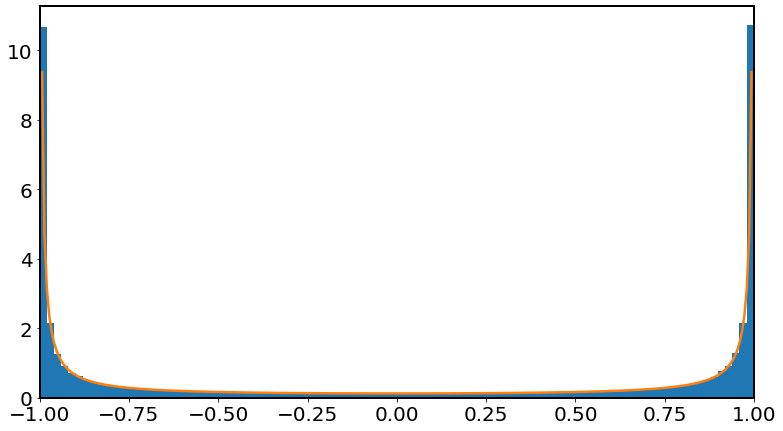

In [10]:
eta_min = -4
eta_max = 4
psuedoR = np.random.uniform(eta_min, eta_max, N_events)

cos_theta = np.tanh(psuedoR)
xax_cos = np.linspace(-1,1, 300)
theoretical_cos = (1./(eta_max - eta_min))*(1./(1-xax_cos**2))


plt.hist(cos_theta, N_bins, density = True)
plt.plot(xax_cos, theoretical_cos)
plt.xlim(-1.,1.)
#plt.ylim(, 11)

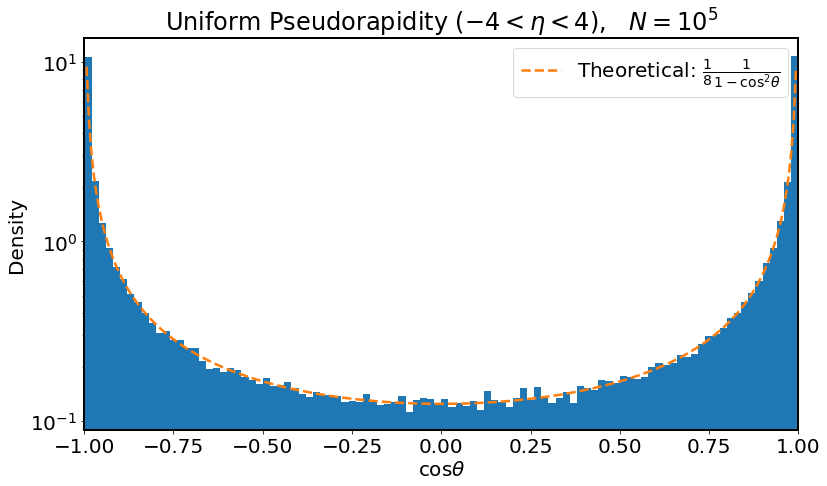

In [11]:
plt.hist(cos_theta, N_bins, density = True)
plt.plot(xax_cos, theoretical_cos, label = r'Theoretical: $\frac{1}{8}  \frac{1}{1 - \cos^2 \theta}$', ls='--')
plt.xlim(-1.,1.)
plt.yscale('log')

plt.xlabel(r'$\cos \theta $')
plt.ylabel('Density')
plt.title(f'Uniform Pseudorapidity ($-4 <\eta < 4$),   $ N= 10^{ {exp} }$')
plt.legend()
plt.savefig('Cos theta distrib from uniform eta.png', dpi=300)

The limits on $\eta$ were arbitiarily choosen. 

This was just an exercise, but a more realistic scenario is outlined [here](https://arxiv.org/pdf/hep-ph/9705393.pdf):

>"It also happens that in most collisions in high-energy hadronic scattering, the distribution of final-state hadrons is approximately uniform in rapidity, within kinematic limits. That is, the distribution of final-state hadrons is approximately invariant under boosts in the z direction. This implies that rapidity and transverse momentum are appropriate variables for analyzing data and that detector elements should be approximately uniformly spaced in rapidity"

# $Q^2$ and $x_B$ distribution

We can get now the distributions for $Q^2$, $W^2$ and $x_B$

In [12]:
Q2 = 2*E_e*E_e_prime*(1-cos_theta)
W2 = m_T**2 + 2*E_T*(E_e-E_e_prime) + 2*(E_e - E_e_prime*cos_theta)*np.sqrt(E_T**2-m_T**2) - 2*E_e*E_e_prime*(1-cos_theta)
x= Q2/ (W2+Q2-m_T**2)

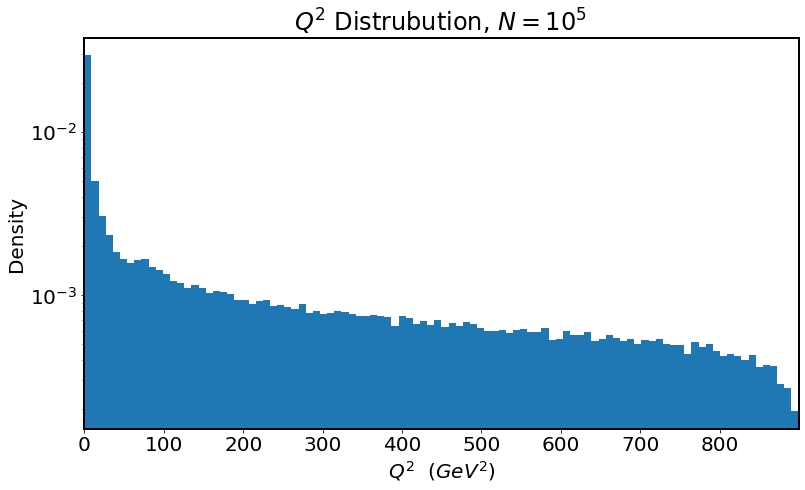

In [13]:
plt.hist(Q2, N_bins, density =True)

#plt.plot(xax,Q2_theoretical, lw = 2, label = r'Theoretical: $ \frac{1}{4 E_e (E_e-1)}\log (    \frac{min\{4E_e^2, \frac{E_e Q_0^2}{(1 GeV)}\} } {Q_0^2} ) $', 
#         ls='--', alpha =0.85)


plt.title( f'$Q^2$ Distrubution, $ N= 10^{ {exp} }$ ')
plt.xlabel('$Q^2  \ \ (GeV^2)$')
plt.ylabel('Density')

plt.xlim(0,Q2.max())
plt.yscale('log')


#plt.legend(fontsize=18)
#plt.savefig('EIC DIS - Q2 Distribution.png', dpi=300)

(0.938, 6339.677590750961)

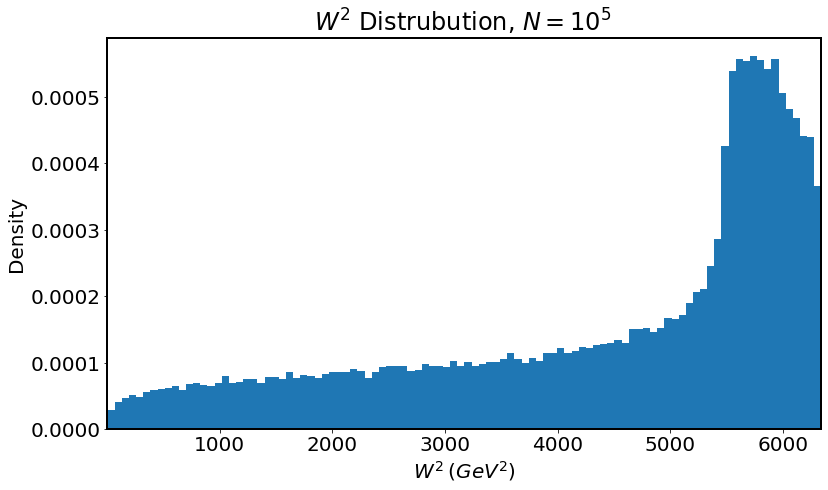

In [14]:
plt.hist(W2, N_bins, density =True)

plt.title( f'$W^2$ Distrubution, $ N= 10^{ {exp} }$ ')
plt.xlabel('$W^2  \:(GeV^2)$')
plt.ylabel('Density')

plt.xlim(m_T,W2.max())
#plt.savefig('EIC DIS - W2 Distr.png', dpi=300)

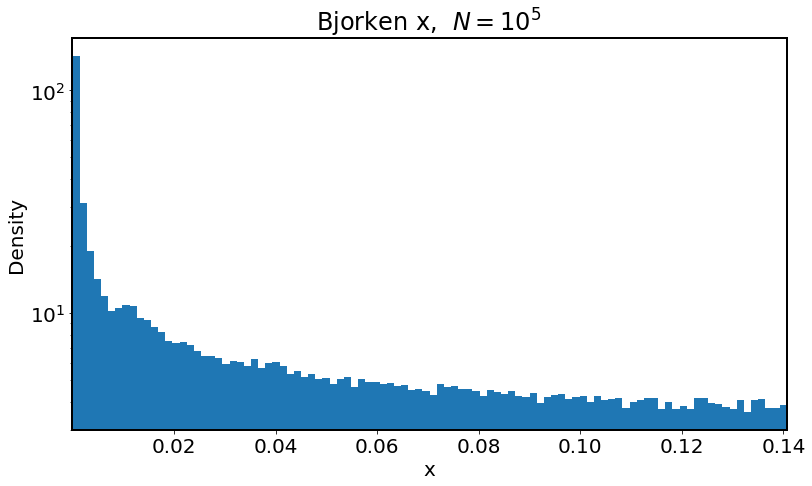

In [15]:
plt.hist(x,N_bins, density = True)
plt.title(f'Bjorken x,  $ N= 10^{ {exp} } $ ' )
plt.xlim(x.min(),x.max())
plt.ylabel('Density')
plt.xlabel('x')
plt.yscale('log')

Text(0.5, 1.0, '$ N= 10^{5} $ ')

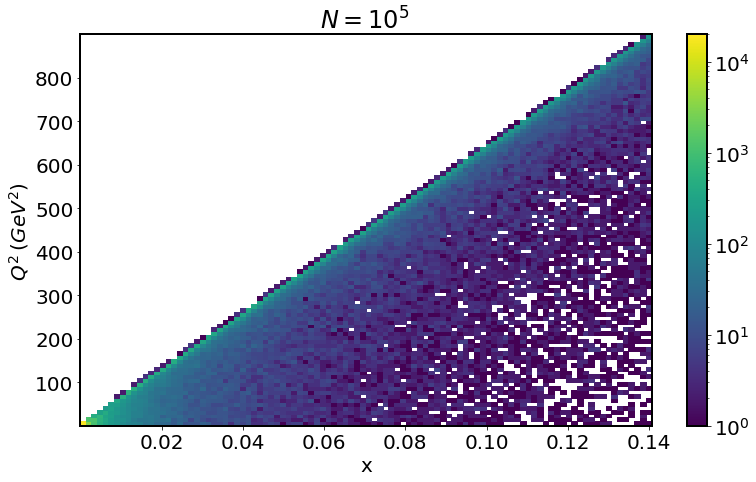

In [16]:
import matplotlib as mpl
plt.hist2d(x, Q2, N_bins, norm=mpl.colors.LogNorm())
plt.colorbar()
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$ ')
plt.title(f'$ N= 10^{ {exp} } $ ' )

#plt.xscale('log')
#plt.yscale('log')

Text(0.5, 1.0, '  $ N= 10^{5} $ ')

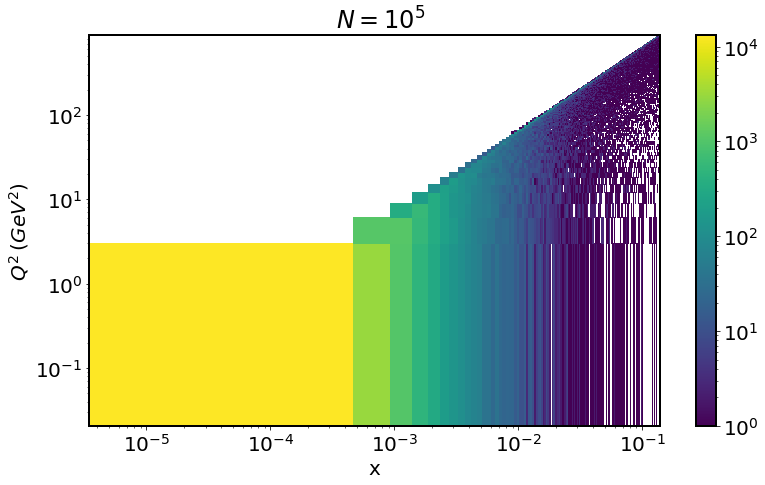

In [17]:
plt.hist2d(x, Q2, 3*N_bins,  
          norm=mpl.colors.LogNorm()
          )
plt.colorbar()
plt.xlabel('x')
plt.ylabel('$Q^2 \: (GeV^2)$ ')
plt.xscale('log')
plt.yscale('log')
plt.title(f'  $ N= 10^{ {exp} } $ ' )

From last time we found:
$$Pr (Q^2=Q_0^2) = \frac{1}{2 E_e} \int_{max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)} \}}^{1- \frac{Q_0^2}{2E_e^2}} dz \frac{1}{1-z}   Pr \left( cos(\theta) = z  ,  E_e' = \frac{Q_0^2}{2 E_e (1-z)} \right)$$
Now, 
$$Pr (Q^2=Q_0^2) = \frac{1}{2 E_e} \int_{max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)} \}}^{1- \frac{Q_0^2}{2E_e^2}} dz \frac{1}{1-z}   \frac{1}{E_e-1}  \frac{1}{8(1-z^2)}$$
$$=  \frac{1}{16 E_e(E_e-1)} \int_{max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)} \}}^{1- \frac{Q_0^2}{2E_e^2}} dz \frac{1}{(
1-z)^2 (1+z)} $$
Evaluating [this](https://www.wolframalpha.com/input/?i=integral+of+1%2F+%28%281-x%29%5E2+%281%2Bx%29%29):
$$\int dz \frac{1}{(1-x)^2 (1+x)} = \frac{1}{4} \bigg(  \frac{2}{1-x} - \log \big( -1+x \big) + \log \big( 1+x \big)  \bigg) $$

$$=  \frac{1}{64 E_e(E_e-1)}  \bigg[ \bigg(  - \frac{2}{\frac{Q_0^2}{2E_e^2}} - \log \big( -\frac{Q_0^2}{2E_e^2} \big)  + \log \big(  2-\frac{Q_0^2}{2E_e^2}\big)\bigg) 
-\bigg(- \frac{2}{1-max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)}\} }-  \log \big(- 1+max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)}\} \big)      + \log \big(  2 -max\{-1, 1-\frac{Q_0^2}{2E_e (1 GeV)}\}\big)       \bigg) \bigg]$$ 

There's a negative log in the two terms, I assumed they cancelled. This can probably be done more rigorously.

In [18]:
xax = np.linspace(Q2.min(), Q2.max(), 300)

def integral_result(var):
    return 0.25*(2./(1-var) - np.log(1-var) + np.log(1+var) )

def Q_theoretical_func(q2):
    two_values = np.array([-0.999, 1- q2/(2*E_e) ]) # Unclear why this works. Putting more 9's makes the result worse. 
    used_value = np.max(two_values)
    
    return 1./(16*E_e*(E_e-1))*(integral_result(1-q2/(2*E_e**2)) -integral_result(used_value) )

In [19]:
y_axis = np.array([Q_theoretical_func(q2) for q2 in xax])

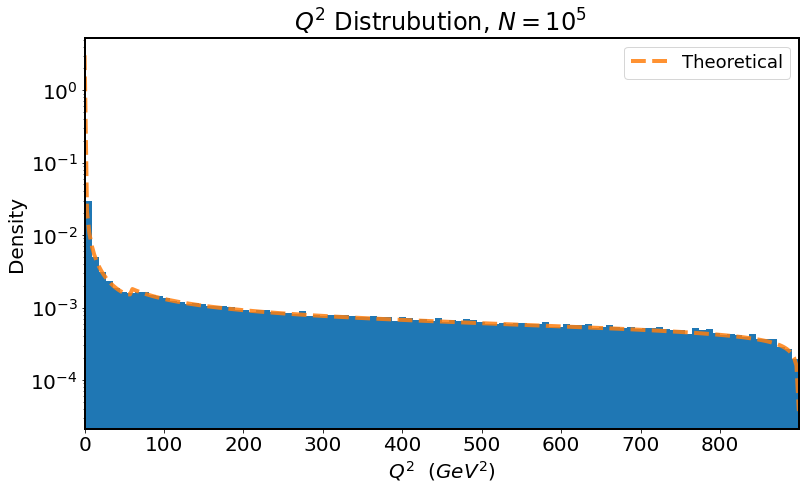

In [20]:
plt.hist(Q2, N_bins, density =True)

plt.plot(xax,y_axis, label = 'Theoretical', ls='--', alpha =0.85, lw=4)
plt.yscale('log')

plt.title( f'$Q^2$ Distrubution, $ N= 10^{ {exp} }$ ')
plt.xlabel('$Q^2  \ \ (GeV^2)$')
plt.ylabel('Density')

plt.xlim(0,Q2.max())
plt.yscale('log')

plt.legend(fontsize=18)
#plt.savefig('EIC DIS - Q2 Distribution.png', dpi=300)